# 데이터 생성

- 경사하강법을 선형회귀로 구현
  - 데이터 생성


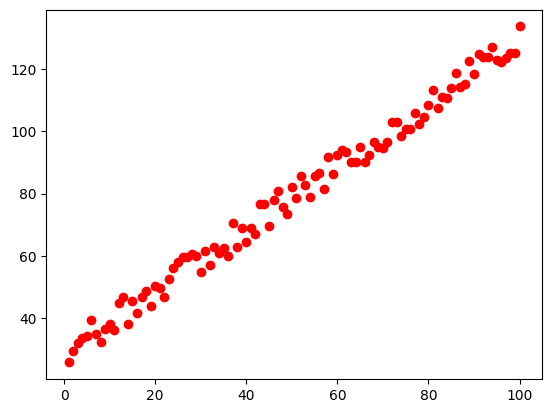

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random


def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)

    for i in range(0, numPoints):
        x[i][0] = 1  # 데이터 x의 상수항에는 1
        x[i][1] = i  # 데이터 x 값은 1씩 증가시킴
        y[i] = (i + bias) + random.uniform(0, 1) * variance  # 데이터 y에 bias 생성

    return x, y


x, y = gen_data(100, 25, 10)  # 100개의 데이터 생성

plt.plot(x[:, 1] + 1, y, "ro")  # 데이터 x와 y의 상관관계 그래프 작성
plt.show()

- 생성된 데이터에 경사하강법 적용


In [10]:
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()  # x의 전치행렬을 계산. 경량화된 연산 준비
    theta_list = []  # 반복단계의 파라미터 저장
    cost_list = []  # 반복단계의 비용 저장
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)  # 예측값 계산
        loss = hypothesis - y  # 손실
        cost = np.sum(loss**2) / (2 * m)  # 비용 계산
        gradient = np.dot(xTrans, loss) / m  # gradient 계산
        theta = theta - alpha * gradient  # theta 업데이트
        if i % 250 == 0:  # 학습 모니터링을 위해 250번마다 저장
            theta_list.append(theta)
            cost_list.append(cost)

    return (
        theta,
        np.array(theta_list),
        cost_list,
    )  # 학습 파라미터 theta, 저장된 파라미터 리스트, 비용 리스트


m, n = np.shape(x)  # x의 shape(샘플수 추출)
numIterations = 5000  # 반복회수 : 5000
alpha = 0.0005  # 모델의 파라미터 업데이트 속도 조절
theta = np.ones(n)  # 초기 파라미터는 모든 값을 1로

theta, theta_list, cost_list = gradient_descent(
    x, y, theta, alpha, m, numIterations
)  # 그래디언트 디센트 호출


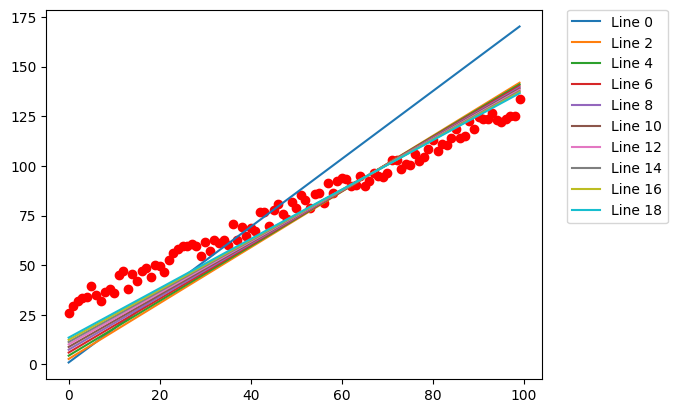

In [11]:
y_predict_step = np.dot(x, theta_list.transpose())
plt.plot(x[:, 1], y, "ro")
for i in range(0, 20, 2):
    plt.plot(x[:, 1], y_predict_step[:, i], label="Line %d" % i)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

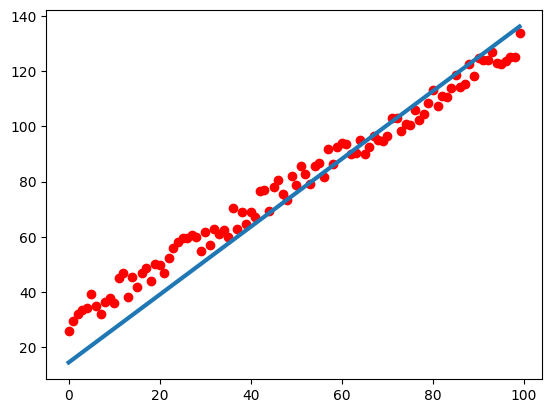

In [12]:
y_predict = np.dot(x, theta)
plt.plot(x[:, 1], y, "ro")
plt.plot(x[:, 1], y_predict, lw=3)
plt.show()

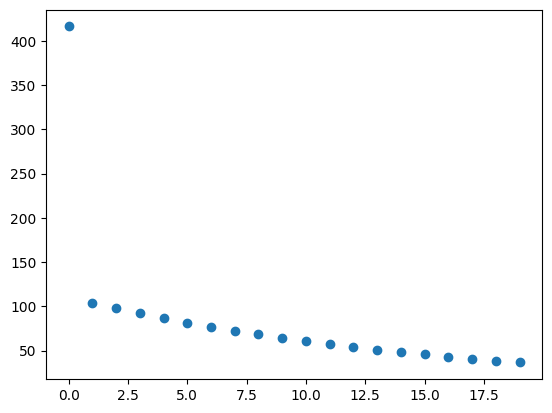

In [13]:
iterations = range(len(cost_list))
plt.scatter(iterations, cost_list)
plt.show()